# MALIGNANT COMMENTS CLASSIFICATION

## Problem Statement:

**The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.**

**Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.**

**There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.**

**Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.**

**Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.**

**There are two dataset train and test.**

**Train dataset: The training set which contains comments with their binary labels.**
**Test dataset: The test set for which the predictions are to be done. It includes id and comments_text.**

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,hamming_loss,log_loss
from sklearn.model_selection import GridSearchCV

# Algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

### Importing Train and Test datasets

In [ ]:
# reading train.csv_file
train_df = pd.read_csv("train.csv")
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
# Reading test.csv file
test_df = pd.read_csv("test.csv")
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


#### Here we are provided with train and test datasets. Both the datasets provides information about the online malignant comments.

* The train dataset comprised of both dependent variable (target) and independent variables. In train dataset the label can either 0 or 1, where 0 denotes a NO whlie 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. Since the target columns consists of 2 classes 0 and 1, so we can state it as "Classification Problem" statement.
* The test dataset contains only independent variables.

So, I will use train dataset for building the model and then will use the test dataset for getting prediction from the trained best model.

### Exploratory Data Analysis

In [ ]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in train dataset".format(train_df.shape[0], train_df.shape[1]))
print("There are {} rows and {} columns in test dataset".format(test_df.shape[0], test_df.shape[1]))

There are 159571 rows and 8 columns in train dataset
There are 153164 rows and 2 columns in test dataset


* The train dataset contains 159571 rows and 8 columns. This train dataset contains both dependent and independent variables. 
* The test dataset contains 153164 rows and 2 columns. The test dataset contains only independent variable and there is no label.

In [ ]:
# Checking the column names of both the datasets
print("Columns present in train dataset:",train_df.columns)
print("\n")
print("Columns present in train dataset:",test_df.columns)

Columns present in train dataset: Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')


Columns present in train dataset: Index(['id', 'comment_text'], dtype='object')


These are the columns present in both the train and test datasets.

In [ ]:
# To get the good overview of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
# To get the good overview of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


* The info() method gives the information about the dataset which includes indexing type,column type, npo null values and memory usage.
* The train dataset contains 2 different types of data, integer and object. There are 2 columns with object datatype.
* The test dataset contains only object datatype. So it should get encoded using appropriate encoding techniques before building machine learning models.

In [ ]:
# Checking for null values
print("Null values intrain dataset:\n", train_df.isnull().sum())
print("\nNull values intrain dataset:\n", test_df.isnull().sum())

Null values intrain dataset:
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Null values intrain dataset:
 id              0
comment_text    0
dtype: int64


As we can see there is no null data present in any of the datasets. Lets visualize it using heatmap.

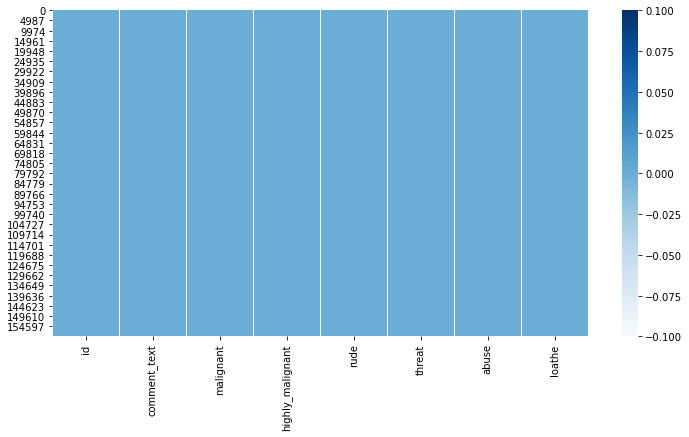

In [ ]:
# Lets visualize the null values clearly in train and test dataset
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(),cmap="Blues")
plt.show()

It is clear from the visualization that there is no missing data in train dataset.

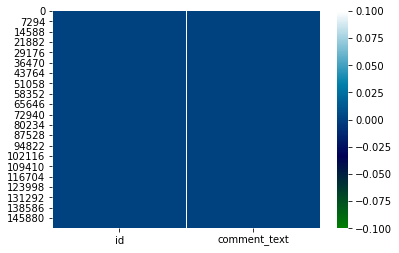

In [ ]:
# Let's visualize the null values clearly in test dataset using heat map
sns.heatmap(test_df.isnull(), cmap="ocean")
plt.show()

It is clear from the visualization that there is no missing data in test dataset.

In [ ]:
# Let's check for duplicate values if there are any
print("Duplicate entries in the train dataset:",train_df.duplicated().sum())
print("Duplicate entries in the test dataset:",test_df.duplicated().sum())

Duplicate entries in the train dataset: 0
Duplicate entries in the test dataset: 0


It is good tosee that there are no duplicate entries present in the dataset.

In [ ]:
# Checking the number of unique values in each column of dataset
train_df.nunique().to_frame("No of unique values")

,No of unique values
id,159571
comment_text,159571
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


Above are the number of unique values present in the columns of the train dataset.

In [ ]:
# Dropping id column
train_df.drop("id",axis=1,inplace=True)

I have dropped id column as it was containing only unique values for every row which we don't want for predictions.

In [ ]:
# Checking value counts for each feature

cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in cols:
    print("Value counts of {} :".format(i))
    print(train_df[i].value_counts())
    print('*'*100)

Value counts of malignant :
0    144277
1     15294
Name: malignant, dtype: int64
****************************************************************************************************
Value counts of highly_malignant :
0    157976
1      1595
Name: highly_malignant, dtype: int64
****************************************************************************************************
Value counts of rude :
0    151122
1      8449
Name: rude, dtype: int64
****************************************************************************************************
Value counts of threat :
0    159093
1       478
Name: threat, dtype: int64
****************************************************************************************************
Value counts of abuse :
0    151694
1      7877
Name: abuse, dtype: int64
****************************************************************************************************
Value counts of loathe :
0    158166
1      1405
Name: loathe, dtype: int64
*******************

These are the value counts of the columns present in the train dataset.

### Description of Dataset

In [ ]:
# Statistical summary of the dataset
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

* From the above description we can observe that the counts of every column is same which means there are no missing values present in the dataset.
* The minimum and maximum values of the features are same, they have 0 and 1 respectively.
* The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.
* By summarizing the data we can say there are no outliers but the data is skewed to right in all the columns which means presence of skewness. Since we have only categorical columns there is no need to remove outliers or skewness.

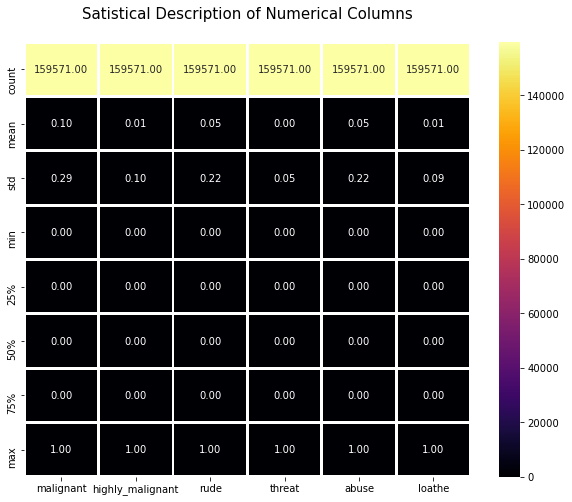

In [ ]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(train_df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="inferno")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)
plt.show()

From the heatmap we can observethe statistical summary of the numerical features present in the dataset. 

In [ ]:
# Checking the statistical summary of the test dataset
test_df.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,f56c08800c17ea5b,Also worth pointing out that it is a major par...
freq,1,1


Above is the statistical description of test dataset.

In [ ]:
# Checking vale counts of "comment_text"
train_df['comment_text'].value_counts()

Thanks, Guy.  I accept the block, and I understand that it was probably the right thing to do.  Sometimes I think there ought to be a Wikipedia version of alt.flame, where editors can air their grievances in the meanest way possible.  I don't know that I'll return.  This is extremely stressful for me, having to swallow all kinds of comments that need to be made.  With the PTSD, I have a low threshhold for attacks of anger.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

By observing the value counts of the comments we can say that there are many numbers, words, as well as punctuations which are not significant for the predictions.So we need to do lot of text processing.

#### Checking percentage of good and bad comments from all features combiningly in dataset


In [ ]:
good_comments = train_df[(train_df['malignant']!=1) & (train_df['highly_malignant']!=1) & (train_df['rude']!=1) & 
                            (train_df['threat']!=1) & (train_df['abuse']!=1) & (train_df['loathe']!=1)]
percent = len(good_comments)/len(train_df)*100
print("Percentage of Positive comments:",percent)
print("Percentage of Negative comments:",(100-percent))

Percentage of Positive comments: 89.83211235124176
Percentage of Negative comments: 10.167887648758239


We can observe about 90% of the comments are positive and only 10% of the comments falls down into negative.

#### Checking percentage of comments taht are toxic compared to normal comments

In [ ]:
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in cols:
    print("Percentage of toxic comments compared to normal comments in {} :".format(i, train_df[i].value_counts(normalize=True)*100))
    print(train_df[f'{i}'].value_counts(normalize=True)*100)
    print('*'*100)

Percentage of toxic comments compared to normal comments in malignant :
0    90.415552
1     9.584448
Name: malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in highly_malignant :
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in rude :
0    94.705178
1     5.294822
Name: rude, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in threat :
0    99.700447
1     0.299553
Name: threat, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in ab

As we know 0 indicates the good or neutral comments and 1 indicates the negative comments. So, from the above we can infer that more than 90% of the comments in all the columns fall down into positive comments and only few comments are considered to be negative or bad .

### Feature Engineering

Lets create a new column "label" which is a sum of all the target features.

In [ ]:
# Creating a new feature having negative and non negative comments for the particular comment.
cols = [ 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
train_df[cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [ ]:
# Label column is the sum of all the target features
train_df['label'] = train_df[cols].sum(axis=1)
train_df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


I have created a new feature "label" which is containing both good and bad comments.

In [ ]:
train_df.label.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

We can see that 0 has more weightage, whereas 6 has lesser weightage.

In [ ]:
#Scaling the label column that is converting it from multiple labels into binary
train_df['label'] = train_df['label'] >0
train_df['label'] = train_df['label'].astype(int)
train_df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [ ]:
# Checking value counts for label after scaling
train_df.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

Now label has two classes0 and 1, where 0 indicates good/neutral comments and 1 indicates bad comments.

In [ ]:
# Creating new column for length of comments
train_df['comment_length']=train_df.comment_text.str.len()
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


I have created new column "comment_length" which contains the length of the comment text.

In [ ]:
# Adding new column comment_length to check length of comment_text characters in test data
test_df['comment_length']=test_df.comment_text.str.len()
test_df

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


In test dataset also I have created new column "comment_length".

## Data Visualization

### Univariate Analysis

In [ ]:
# Sorting the number of counts for every target label
counts = train_df.iloc[:,1:].sum()
counts

malignant              15294
highly_malignant        1595
rude                    8449
threat                   478
abuse                   7877
loathe                  1405
label                  16225
comment_length      62893130
dtype: int64

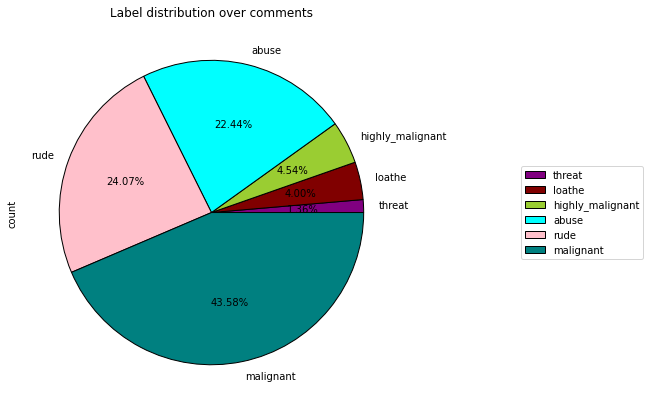

In [ ]:
# Label distribution comments using pie plot
labels = ['malignant','highly_malignant','rude','threat','abuse','loathe']
colors = ['purple','maroon','yellowgreen','cyan','pink','teal']

x = train_df[labels].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
x.plot.pie(y='count',title = 'Label distribution over comments',autopct='%.2f%%', colors=colors,figsize = (7,7),
          wedgeprops = {'linewidth':1, 'edgecolor':'k'})\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

### Observations:
From the pie chart we can notice approximately 43% of the comments are malignant, 24% of the comments are rude and 22% are abuse. The count of malignant comments are high compared to other type of comments and the count of threat comments are very less.

0    143346
1     16225
Name: label, dtype: int64


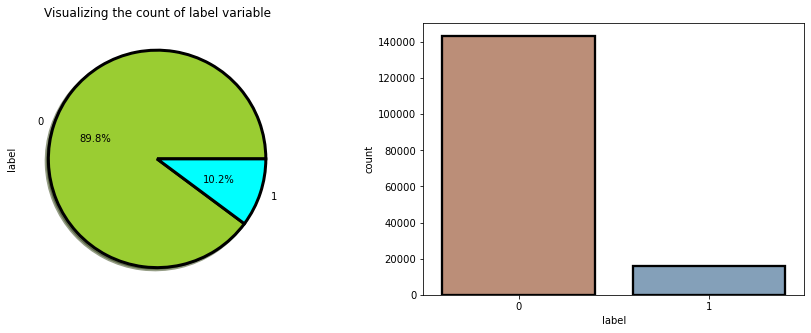

In [ ]:
# Visualizing count of negative and non negative comments combining 
print(train_df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellowgreen", "cyan"]
train_df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of label variable')
ax = sns.countplot('label', data=train_df, ax=ax[1],palette="twilight_shifted_r",linewidth=2.3, edgecolor="k")
plt.show()

### Observations:
From the above plots we can observe the count of positive comments are high compared to the negative comments. Here around 90% of the comments are turned out to be a positive comments or neutral comments and only 10% of them are considered to be negative comments. We can also observe the data imbalance issue here, we need to balance the data.

0    144277
1     15294
Name: malignant, dtype: int64


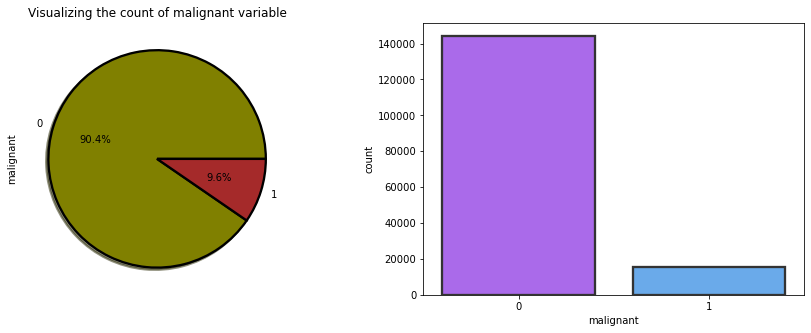

In [ ]:
# Visualizing count of malignant and non malignant comments
print(train_df['malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["olive", "brown"]
train_df['malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of malignant variable')
ax = sns.countplot('malignant', data=train_df, ax=ax[1],palette="cool_r",linewidth=2.3, edgecolor=".2")
plt.show()

### Observations:
From the above plots we can observe the count of malignant comments are lesser compared to non malignant comments. That is around 90% of the comments are non malignant and only 9.6% of the comments are malignant.

0    157976
1      1595
Name: highly_malignant, dtype: int64


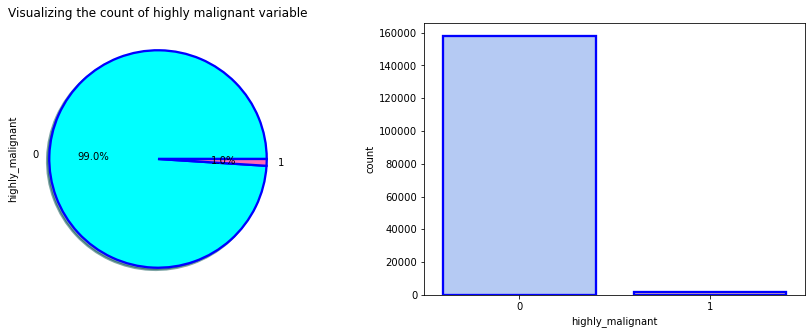

In [ ]:
# Visualizing count of highly malignant and normal comments
print(train_df['highly_malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["cyan", "hotpink"]
train_df['highly_malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2.3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of highly malignant variable')
ax = sns.countplot('highly_malignant', data=train_df, ax=ax[1],palette="coolwarm",linewidth=2.3, edgecolor="b")
plt.show()

### Observations:
From the plot we can observe the count of highly malignant comments are just 1% and 99% of the comments are normal.

0    151122
1      8449
Name: rude, dtype: int64


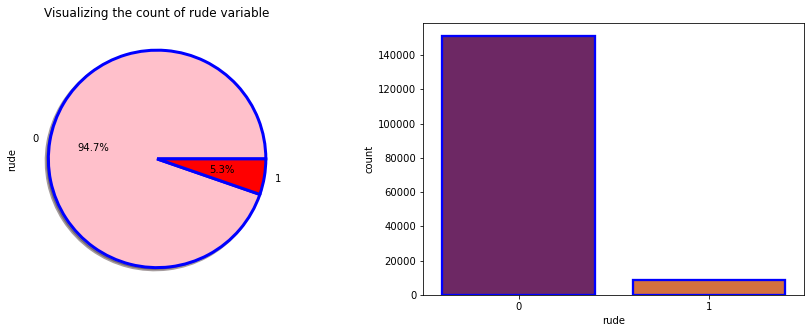

In [ ]:
# Visualizing count of rude and normal comments
print(train_df['rude'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["pink", "r"]
train_df['rude'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                         wedgeprops = {'linewidth':3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of rude variable')
ax = sns.countplot('rude', data=train_df, ax=ax[1],palette="inferno",linewidth=2.3, edgecolor="b")
plt.show()

### Observations:
The count of rude comments are very less compared to normal comments. Around 94% of the comments are falls down into normal comments and 5% considered to be rude comments.

0    159093
1       478
Name: threat, dtype: int64


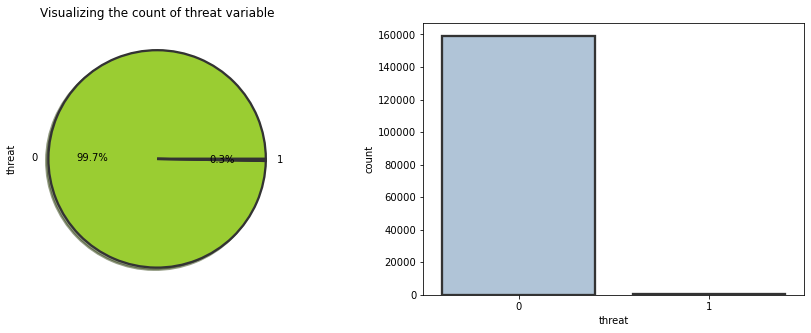

In [ ]:
# Visualizing count of threat and normal comments
print(train_df['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellowgreen", "b"]
train_df['threat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                           wedgeprops = {'linewidth':2.3, 'edgecolor':'.2'},
                                                     colors=colors,title = 'Visualizing the count of threat variable')
ax = sns.countplot('threat', data=train_df, ax=ax[1],palette="BuPu",linewidth=2.3, edgecolor=".2")
plt.show()

### Observations:
Here also 0.3% of the comments are threat and 99% of the comments are look normal.

0    159093
1       478
Name: threat, dtype: int64


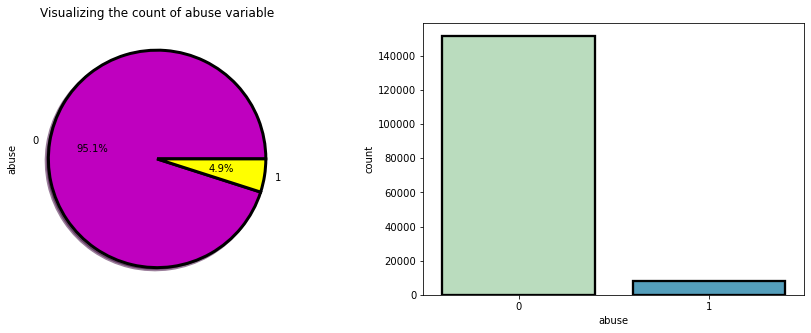

In [ ]:
# Visualizing count of abuse and normal comments
print(train_df['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["m", "yellow"]
train_df['abuse'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                          title = 'Visualizing the count of abuse variable')
ax = sns.countplot('abuse', data=train_df, ax=ax[1],palette="GnBu",linewidth=2.3, edgecolor="k")
plt.show()

### Observations:
The count of abusing type comments are relatively low which has 4.9% and 95.1% of the comments are normal.

0    158166
1      1405
Name: loathe, dtype: int64


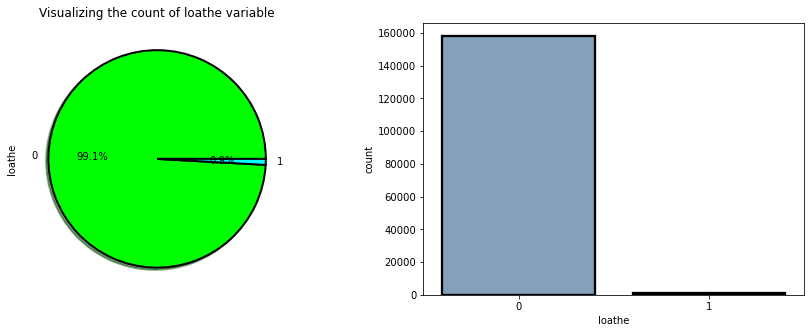

In [ ]:
# Visualizing count of loathe and normal comments
print(train_df['loathe'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lime", "cyan"]
train_df['loathe'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of loathe variable')
ax = sns.countplot('loathe', data=train_df, ax=ax[1],palette="twilight_shifted",linewidth=2.3, edgecolor="k")
plt.show()

### Observations:
The count of normal text comments is high compared to loathe.

### Text Pre-Processing

Using text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Preprocessing involves the following steps:
    

* Removing punctuations and other special characters
* Performing tokenizations
* Removing stop words
* Stemming and Lemmatisation
* Splitting dataset into training and testing

The String library contains punctuation characters. This is imported and all numbers are appended to this string. From the value count function we have seen that comment_text feature contains string such as won't, din't,etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character 'represented as \' in escape sequence notation is replaced by empty character in puntuation string.

In [ ]:
# Importing required libraries
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

Converting all the text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP,nlp,Nlp, we are treating all these words as different words/tokens. It is better to lower case the text as the first step in this text preprocessing. Because if we are trying to remove stopwords all words need to be in lower case.

In [ ]:
# Replacing '\n' in comment_text
train_df['comment_text'] = train_df['comment_text'].replace('\n',' ')

In [ ]:
# Convert all the comment texts to lower case in train dataset
train_df['comment_text'] = train_df['comment_text'].str.lower()
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


#### Performing the same in test dataset

In [ ]:
# Replacing '\n' in comment_text
test_df['comment_text'] = test_df['comment_text'].replace('\n',' ')

# Convert all comment texts to lower case in test dataset
test_df['comment_text'] = test_df['comment_text'].str.lower()
test_df

,id,comment_text,comment_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,367
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,00017563c3f7919a,":if you have a look back at the source, the in...",205
4,00017695ad8997eb,i don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"one of the founding nations of the...",502


I have converted comments into lower casr using the above coding in both train and test data.
Now lets clean the data by removing/replacing URLs,numbers,punctuations,converting numbers to words etc. There are special characters too which we will need to remove.Also, removing extra white spaces is also important. We can not get any information from extra spaces, so that we can ignore all additional spaces such as 0ne or more newlines, tabs, extra spaces.

In [ ]:
# Cleaning data in train dataset
# Replacing email addresses with "email"
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbol with 'moneysymb' 
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$','dollars')

# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replacing numbers with 'numbr'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

In [ ]:
# Removing punctuations
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+',' ')

# Remove leading and trailing whitespaces
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$','')

### Removing stopwords

* **Stopwords** are common words and irrelevant words from which we can't get any useful information for our model or problem statement.
* Few stopwords are 'a','an','the',etc. Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed.

### Stemming and Lemmatization

* **Stemming** is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word. E.g. words like "stems","stemmer","steeming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.
* **Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document

The wornet library in nltk will be used for this purpose. Stemmer and Lemmatizer are also imported from nltk.

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])
train_df["comment_text"] = train_df["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stop_words))
lem=WordNetLemmatizer()
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

#### Performing the above preprocessing steps for test data as well

In [ ]:
# Cleaning data in test dataset
# Replace email addresses with "email"
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
test_df["comment_text"] = test_df["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
test_df["comment_text"] = test_df["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
test_df["comment_text"] = test_df["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
test_df["comment_text"] = test_df["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^\s+|\s+?$', '')

In [ ]:
stp_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

test_df["comment_text"] = test_df["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stp_words))
lemma=WordNetLemmatizer()
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(t) for t in x.split()))

we have successfully completed cleaning and preprocessing the data in both train and test datasets.

In [ ]:
# New column(clean_length) after removing punctuations, stopwords in train dataset
train_df['clean_length'] = train_df.comment_text.str.len()
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,168
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page numbr numbr,0,0,0,0,0,0,0,99,48
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


In [ ]:
# New column (clean_length) after removing punctuations, stopwords in test dataset
test_df['clean_length'] = test_df.comment_text.str.len()
test_df

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


I have created new column "clean_length" in both train and test dataset after cleaning the data. We can see that nearly half of the text has been removed from the comment text using required preprocessing.

In [ ]:
# Total length removal in train data
print("Original length:",train_df.comment_length.sum())
print("Clean length:",train_df.clean_length.sum())
print("Total words removed:",(train_df.comment_length.sum()) - (train_df.clean_length.sum()))

Original length: 62893130
Clean length: 39965369
Total words removed: 22927761


Above are the total length of train dataset before and after cleaning data. And the total words removed after preprocessing.

In [ ]:
# Total length removal in test data
print('Original Length:',test_df.comment_length.sum())
print('Clean Length:',test_df.clean_length.sum())
print("Total Words Removed:", (test_df.comment_length.sum()) - (test_df.clean_length.sum()))

Original Length: 55885733
Clean Length: 35484713
Total Words Removed: 20401020


Above are the total length of test dataset before and after cleaning data. And the total words removed after preprocessing.

### Plotting WordCloud for each label

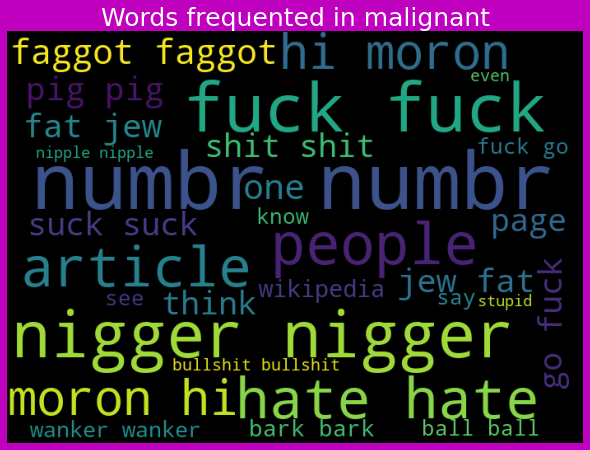

In [ ]:
# Getting sense of loud words in malignant
from wordcloud import WordCloud

# Print only rows where the toxic category label value is 1 (i.e the comment is toxic)
malignants = train_df['comment_text'][train_df['malignant']==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(malignants))

plt.figure(figsize=(8,6),facecolor='m')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label="Words frequented in malignant",fontdict={'fontsize':25,'color':'white'})
plt.show()

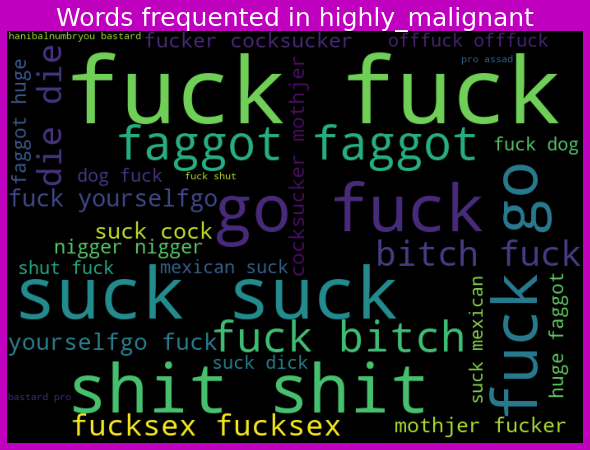

In [ ]:
# Getting sense of loud words in highly malignant

# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
highly_malignants = train_df['comment_text'][train_df['highly_malignant']==1]

high_malignant_cloud = WordCloud(width=700,height=500,background_color='black',
                                 max_words=30).generate(' '.join(highly_malignants))

plt.figure(figsize=(8,6),facecolor='m')
plt.imshow(high_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in highly_malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

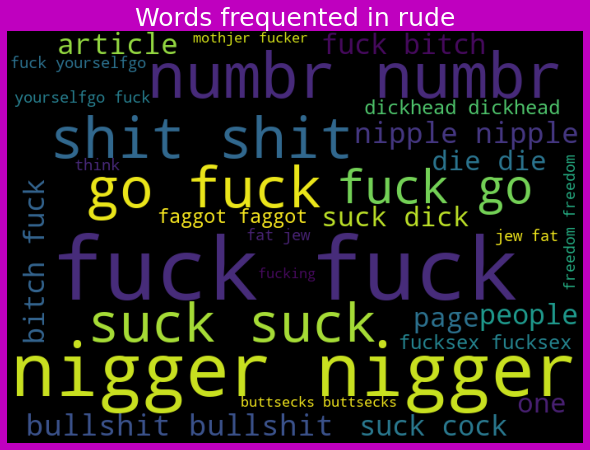

In [ ]:
# Getting sense of loud words in rude
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
rude_text = train_df['comment_text'][train_df['rude']==1]

rude_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(rude_text))

plt.figure(figsize=(8,6),facecolor='m')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in rude",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

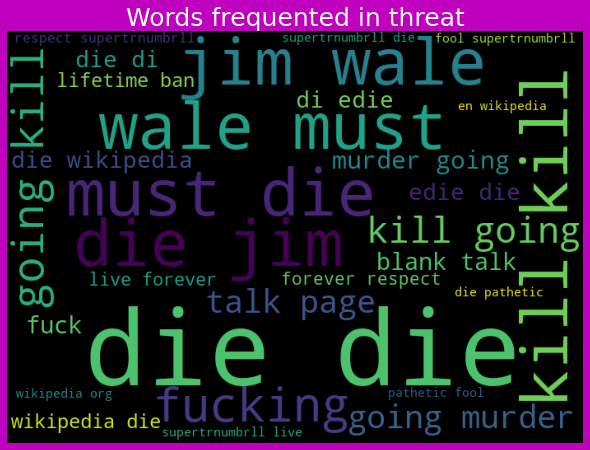

In [ ]:
# Getting sense of loud words in threat
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
threats = train_df['comment_text'][train_df['threat']==1]

threat_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(threats))

plt.figure(figsize=(8,6),facecolor='m')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in threat",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

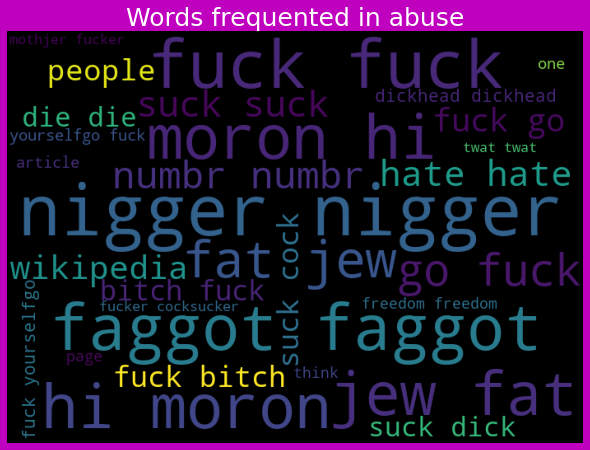

In [ ]:
# Getting sense of loud words in abuse
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
abuse_text = train_df['comment_text'][train_df['abuse']==1]

abuse_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(abuse_text))

plt.figure(figsize=(8,6),facecolor='m')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in abuse",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

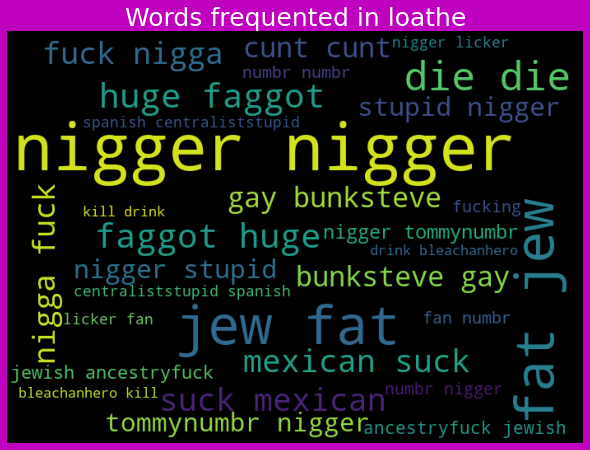

In [ ]:
# Getting sense of loud words in loathe
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
loathe_text = train_df['comment_text'][train_df['loathe']==1]

loathe_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(loathe_text))

plt.figure(figsize=(8,6),facecolor='m')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in loathe",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

### Observations:

* From the above plots we can clearly see the toxic words which are the indication of malignant, highly_malignant,rude,threat, abuse and loathe words.
* Here most frequent words used for each label is displayed in the word cloud based on different label.

### Checking the correlation in train dataset

In [ ]:
# Checking the correlation between features and the target
cor = train_df.corr()
cor

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,-0.054413,-0.052321
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.010175,0.014264
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,-0.042910,-0.039608
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,-0.007917,-0.010046
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,-0.045027,-0.042405
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,-0.013628,-0.008146
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,-0.051643,-0.050172
comment_length,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,-0.051643,1.000000,0.987268
clean_length,-0.052321,0.014264,-0.039608,-0.010046,-0.042405,-0.008146,-0.050172,0.987268,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

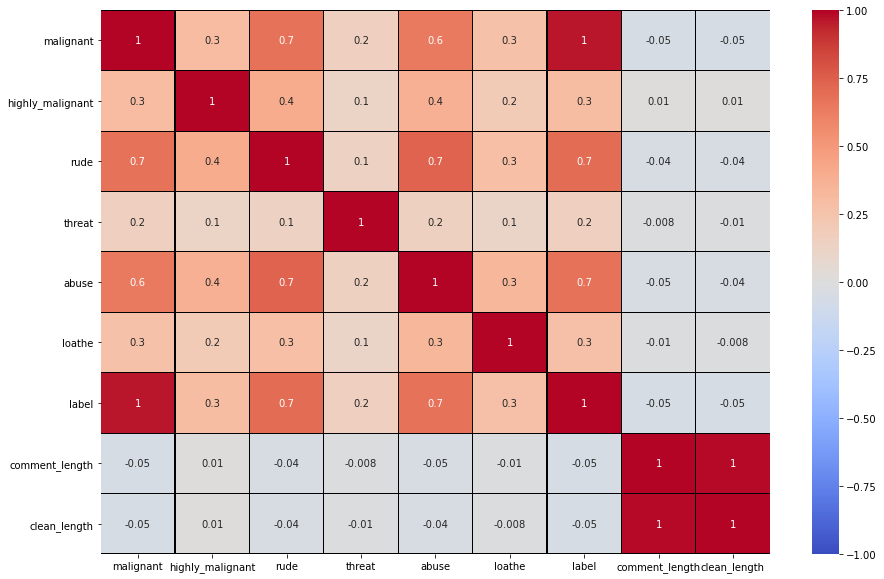

In [ ]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(train_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="coolwarm",
            annot_kws={'size':10})
plt.yticks(rotation=0);

* This heatmap shows the correlation matrix of the data. We can observe the relation between one feature to other and relation between features and label.
* From the heat map we can observe the features have some strong relation with each other. We can also observe multicollinearity problem.

I have successfully completed cleaning data. Let's use TF-IDF vactorizer, it'll help to transform the text data to feature vector which can be used as input in our modelling. It is a common algorithm to transform text into numbers. It measures the originality of a word by comparing the frequency of appearance of a word in a document with the number of documents the words appear in.

### Separating features and label into X and y

#### Converting tokens into vectors for moving forqward to build machine learning model.

In [ ]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features=15000,stop_words='english')

In [ ]:
# Lets separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(train_df['comment_text'])

y = train_df['label']

# Checking the shape of X and y
print("Shape of x:",X.shape)
print("Shape of y:",y.shape)

Shape of x: (159571, 15000)
Shape of y: (159571,)


In [ ]:
# Doing the same process for test data
x = tf_vec.fit_transform(test_df['comment_text'])
x.shape

(153164, 15000)

I have converted features into number tokens in both train and test datasets. And separated input and output variables.

## Model Building

### Splitting train and test data

In [ ]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)

I am taking 30% of the complete dataset for training purpose and the remaining 70% be used to train the machine learning models using the random state as 42.

In [ ]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)        # Shape of x data
print(y_train.shape,'\t',y_test.shape)        # Shape of y data

(111699, 15000) 	 (47872, 15000)
(111699,) 	 (47872,)


Checked the dimension of both train and test data after splitting them.

### Balancing data using oversampling technique

From the visualization we have seen there is class imbalance issue, lets balance the data using oversampling method.

In [ ]:
# Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#  We are trying to increase the points of minimum label data
OS = RandomOverSampler(0.75)
train_x,train_y = OS.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(train_y)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


I am using RandomOverSampler method to ensure that all the categories present in our label data have the same value. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [ ]:
# Creating instances for different classifiers

LR = LogisticRegression()
MNB = MultinomialNB()
SVC = LinearSVC()
lgbm = LGBMClassifier()
GB = GradientBoostingClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB',MNB))
models.append(('LinearSVC',SVC))
models.append(('LGBMClassifier',lgbm))
models.append(('GradientBoostingClassifier',GB))
models.append(('DecisionTreeClassifier',DTC))
models.append(('AdaBoostClassifier',ABC))
models.append(('XGBClassifier',xgb))

I have created 8 different classification algorithms and are appended in the variable models. Now, let's run a for loop which contains the accuracy of the models along with different evaluation metrics.

In [ ]:
# Creating empty lists
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]
Hamming_loss=[]

for name,model in models:
    print("**********",name,"**********")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score*100)
# Model Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score: ',cv)
    cvs.append(cv*100)
# Auc Roc Score
    roc_auc= roc_auc_score(y_test,y_pred)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
# Log Loss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss) 
# Hamming loss
    ham_loss = hamming_loss(y_test,y_pred)
    print("Hamming loss: ", ham_loss)
    Hamming_loss.append(ham_loss)
    print('\n')
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    print("******************************************************************************")
    print('\n\n')

********** LogisticRegression **********


LogisticRegression()
Accuracy_Score:  0.9548170120320856
Learning Score :  0.9597937313673355
Cross Validation Score:  0.9559694385067514
roc_auc_score:  0.8013347079673924
Log loss :  1.5605694276054651
Hamming loss:  0.04518298796791444


Confusion matrix: 

[[42746   258]
 [ 1905  2963]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.92      0.61      0.73      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872

******************************************************************************



********** MultinomialNB **********


MultinomialNB()
Accuracy_Score:  0.9461271724598931
Learning Score :  0.9493549628913419
Cross Validation Score:  0.9463248326658406
roc_auc_score:  0.7489517036385066
Log loss :  1.860704082

After running the for loop, we can able to observe the accuracy, loss and evaluation metrics of all the models.

### Plotting ROC and compare AUC for all the models used

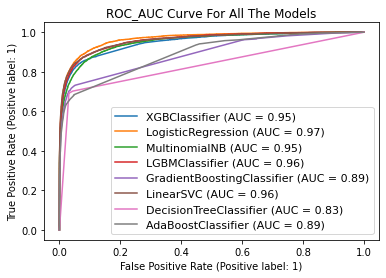

In [ ]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(xgb,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(MNB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lgbm, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plt.title("ROC_AUC Curve For All The Models")
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

I have generated the ROC Curve for all the models used here and it shows the AUC score for the models.

## Model Selection

In [ ]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Validation Score':cvs,
                     'Auc_Roc_Score':rocscore,'Log_Loss':lg_loss,'Hamming_loss':Hamming_loss}) 
Results

,Model,Learning Score,Accuracy Score,Cross Validation Score,Auc_Roc_Score,Log_Loss,Hamming_loss
0,LogisticRegression,95.979373,95.481701,95.596944,80.133471,1.560569,0.045183
1,MultinomialNB,94.935496,94.612717,94.632483,74.895170,1.860704,0.053873
2,LinearSVC,97.486101,95.886949,95.928458,84.621798,1.420607,0.041131
3,LGBMClassifier,96.221989,95.460812,95.551823,80.978041,1.567786,0.045392
4,GradientBoostingClassifier,94.143188,93.935912,94.013323,71.439796,2.094464,0.060641
5,DecisionTreeClassifier,99.908683,94.065424,94.040269,82.988562,2.049752,0.059346
6,AdaBoostClassifier,94.614097,94.487383,94.574829,76.637996,1.903997,0.055126
7,XGBClassifier,96.139625,95.233122,95.362566,79.293759,1.646426,0.047669


**After creating and training different classification algorithms, we can see that the difference between accuracy and cross validation score is less for "LinearSVC". And it is giving less loss values, auc roc score and high accuracy score compared to other algorithms. On this basis I can conclude that "LinearSVC" as the best fitting model. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.**

### Hyperparameter tuning

In [ ]:
# Let's Use the GridSearchCV to find the best parameters in LinearSVC

# Extreme LinearSVC
parameters = {'penalty':['l1','l2'],
              'loss':['hinge','squared_hingemulti_class'],
              'multi_class':['ovr','crammer_singer'],
              'fit_intercept':['True','False'],
              'class_weight':['dict','balanced']}

# Running GridSearchCV for the model Bagging Regressor.
GCV=GridSearchCV(LinearSVC(),parameters,cv=5,scoring='accuracy')

In [ ]:
# Training the best model
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'fit_intercept': ['True', 'False'],
                         'loss': ['hinge', 'squared_hingemulti_class'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

I have used 5 LinearSVC parameters to be saved under the variable "parameters" that will be used in GridSearchCV for finding the best output. Assigned a variable to the GridSearchCV function after entering all the necessary inputs. And we used our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [ ]:
#Getting best parameters
GCV.best_params_

{'class_weight': 'balanced',
 'fit_intercept': 'True',
 'loss': 'hinge',
 'multi_class': 'ovr',
 'penalty': 'l2'}

These are the best parameters obtained after running GridSearchCV.

### Creating final model

In [ ]:
# Creating final model 
comment_model = LinearSVC(penalty='l2',fit_intercept='True',loss='hinge',multi_class='ovr',class_weight='balanced')
comment_model.fit(x_train,y_train)
pred = comment_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score:", acc_score*100)
roc_auc = roc_auc_score(y_test,y_pred)
print('roc_auc_score: ',roc_auc*100)
print('Log loss : ', log_loss(y_test,pred))
print("Hamming loss: ", hamming_loss(y_test,pred))
print("\n")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy score: 93.09617312834224
roc_auc_score:  79.29375891883555
Log loss :  2.3845409870668104
Hamming loss:  0.06903826871657753


Confusion Matrix: 
 [[40390  2614]
 [  691  4177]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     43004
           1       0.62      0.86      0.72      4868

    accuracy                           0.93     47872
   macro avg       0.80      0.90      0.84     47872
weighted avg       0.95      0.93      0.94     47872



I have successfully incorporated the hyper parameter tuning using best parameters of LinearSVC and the accuracy of the model after hyperparameter tuning is 93.09% which is very good.

### Confusion matrix

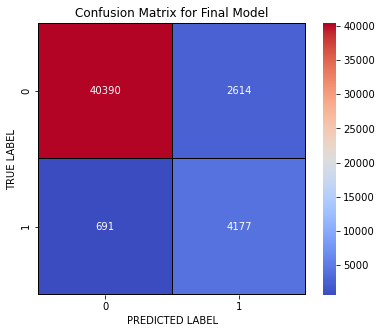

In [ ]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="coolwarm",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values for the final model. And also we can understand the number of times we got the correct outputs and the number of times my model missed to provide the correct prediction.

### Plotting ROC and compare AUC for the Final model

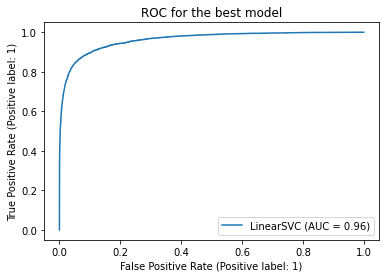

In [ ]:
plot_roc_curve(comment_model,x_test,y_test)
plt.title("ROC for the best model")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 96% after tuning the model.

## Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(comment_model,"Malignant_Comments_Classification.pkl")

['Malignant_Comments_Classification.pkl']

I am using the joblib option to save the final classification model in the form of .pkl.

In [ ]:
# Predicting the trained final model
comment_model.predict(X)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Loading the fianl model
model = joblib.load("Malignant_Comments_Classification.pkl")

I have loaded my saved model to use further and to get the predictions for test data.

## Prediction for test dataset using final model

In [ ]:
# Let's load hte test dataset
test_df

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


I have loaded my cleaned test dataframe. Now, we will predict the values for test data.

In [ ]:
# Predicting the values for test dataset after loading the trained model
Predictions = model.predict(x)
Predictions

array([0, 0, 0, ..., 1, 0, 0])

These are the predicted values for test data.

In [ ]:
# Adding the predicted values for test dataframe
test_df['Predicted_values'] = Predictions
test_df

,id,comment_text,comment_length,clean_length,Predicted_values
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227,0
1,0000247867823ef7,rfc title fine imo,50,18,0
2,00013b17ad220c46,source zawe ashton lapland,54,26,0
3,00017563c3f7919a,look back source information updated correct f...,205,109,0
4,00017695ad8997eb,anonymously edit article,41,24,0
...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238,1
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319,0


Here I have added new predicted values to test dataframe. Using classification model, we have got the predicted values of malignant comments.

In [ ]:
# Checking values counts for predicted values
test_df.Predicted_values.value_counts()

0    138121
1     15043
Name: Predicted_values, dtype: int64

In [ ]:
# Saving the data into csv file
test_df.to_csv("Malignant_Comments_Predicted_Test_Data.csv",index=False)

Finally saving my test data into csv file.

## Conclusion

* This case study gives an idea of NLP text processing in machine learning. In this case study, apart from applying the techniques that we have learnt in the EDA module, we also classified hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.
* From this dataset we were able to understand the idea of Natural Language Processing using machine learning models. This model helps us to understand whether the online comments are malignat or non malignant.
* First we loaded the dataset and have done data cleaning, EDA and text pre-processing techniques like
    * Feature engineering
    * Removing Punctuations and other special characters
    * Splitting the comments into individual words
    * Removing Stop Words
    * Stemming and Lemmatising
    * Checking correlation and scaling and got better insights from the data visualizations.
* Then we did the model training, building the model and finding out the best model on the basis of different metrices like Accuracy Score, Cross Validation Score, roc_auc_score, precision, recall, f1score, log loss and hamming loss. We have created 8 different models. A Result table is made which is comprises of accuracy,cross validation score,auc roc score,learning scores, log loss and hamming loss of each model. Plotted AUC ROC curve for all the models combiningly.
* We got LinearSVC as the best model among all the models as it was giving least difference of accuracy and cv score, and loss also very less compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. So we concluded that LinearSVC as the best algorithm as it was giving high accuracy and AUC after tuning.
* After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values for test data. Further we saved the predicted values test data into csv file.
* Finally, we achieved our goal by building a prototype of online hate and abuse comment classifier.

![Thank%20you.jfif](attachment:Thank%20you.jfif)